<a href="https://colab.research.google.com/github/theBuluku/Independent-Project-week-9/blob/master/IP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement.

1.Perfomorming K-nearest neighbor classification.
2.Performing different splits like 80 - 20,70 - 30 and 60     40 etc
3.To Optimize the K-nearest clasifier so that it can reach    its best perfomance



#Metrics of Success.


Accuracy

ConfusionMatrix

In [0]:
#Importing the environments to use in our projects.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid",context='notebook')
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


In [189]:
#Loading the train dataset(dataset1) and viewing the first 5 rows.
train_df=pd.read_csv('train.csv')
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [0]:
#Showing the rows and columns.
train_df.shape

(891, 12)

In [190]:
#Loading the test dataset(dataset2) and viewing the first 5 rows.
test_df=pd.read_csv('test.csv')
test_df.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [0]:
#Showing the rows and columns.
test_df.shape

(418, 11)

#Exploratory Data Analysis.

In [181]:
# Previewing the information of the dataset
#
print("train dataset infomation")
print("********************")
print(train_df.info())
print("test dataset infomation")
print("********************")
print(test_df.info())

train dataset infomation
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
test dataset infomation
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch 

In [182]:
# Previewing the statistical information of the dataset
#
print("train dataset stastical information")
print("********************")
print(train_df.describe())
print("test dataset stastical information")
print("********************")
print(test_df.describe())

train dataset stastical information
********************
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
test dataset stastical information
********************
       PassengerId      Pclass         Age  ...       Parch        Fare  separator
count   418.000000  418.00

In [0]:
# Getting the names of the columns for both train and test datasets.

print("names of the columns of the train dataset ")
print("********************")
print(train_df.columns)
print("names of the columns of the test dataset ")
print("********************")
print(test_df.columns)

names of the columns of the train dataset 
********************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
names of the columns of the test dataset 
********************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [0]:
# Getting unique values for the train dataset
columns = train_df.columns
for i in columns:
  print(i)
  print(train_df[i].unique())
  print("******************")
  print("\n")

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [0]:
#Importing plotting and visualization environments.
import seaborn as sns
import matplotlib.pyplot as plt


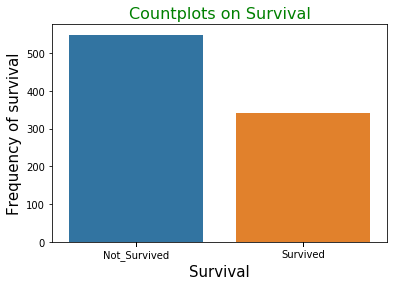

In [0]:
#Showing the bar plots of those who survived and those who dint
sns.countplot(train_df['Survived'])
survival = ["Not_Survived","Survived"]
plt.xlabel("Survival",fontsize=15)
plt.ylabel("Frequency of survival",fontsize=15)
plt.title("Countplots on Survival",fontsize=16,color="green")
plt.xticks(train_df['Survived'], survival, )
plt.show()

This shows that poeple who boarded the ship ,the proportion of people who dint survive were more than those who survived

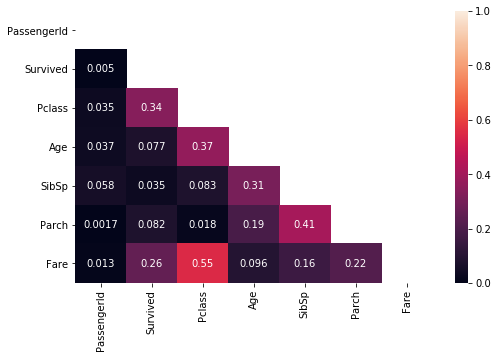

In [0]:
# Correlation heatmap of the numerical variables 
corr  =train_df.corr().abs()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(train_df.corr().abs(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(train_df.corr().abs(), annot=True, mask=heatmap)
plt.show()

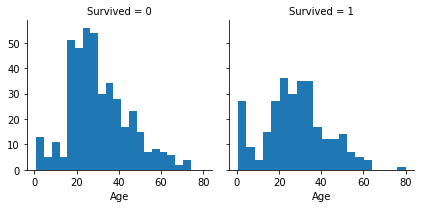

In [0]:
# Plotting a hitogram of Age with respect to survival
face = sns.FacetGrid(train_df, col='Survived')
face.map(plt.hist, 'Age', bins=20,)
plt.show()


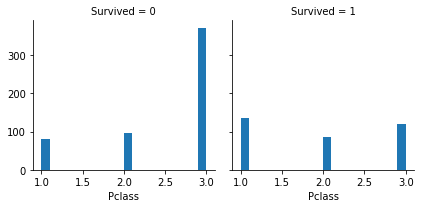

In [0]:
# Plotting a hitogram of Pclass with respect to survival
face = sns.FacetGrid(train_df, col='Survived')
face.map(plt.hist, 'Pclass', bins=20)
plt.show()

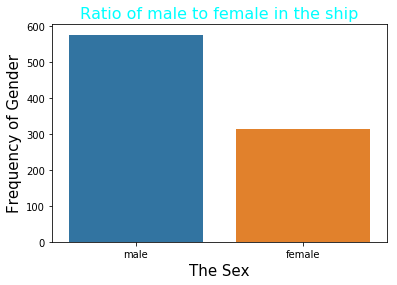

In [0]:
# Plotting a contplot of gender of people in the ship  
sns.countplot(train_df['Sex'])
plt.xlabel("The Sex",fontsize=15)
plt.ylabel("Frequency of Gender",fontsize=15)
plt.title("Ratio of male to female in the ship",fontsize=16,color="cyan")
plt.show()

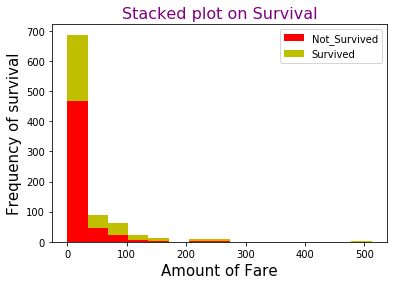

In [0]:
# Plotting a stacked plot of amount of fare based on survival
plt.hist([train_df[train_df['Survived']==0]['Fare'],train_df[train_df['Survived']==1]['Fare']],stacked=True,color=['r','y'],bins=15,label=['Not_Survived','Survived'])
plt.xlabel("Amount of Fare",fontsize=15)
plt.ylabel("Frequency of survival",fontsize=15)
plt.title("Stacked plot on Survival",fontsize=16,color="purple")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


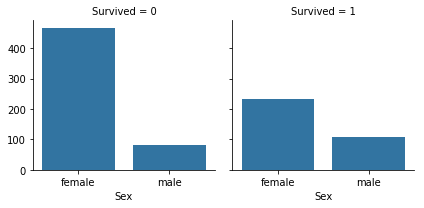

In [0]:
# Plotting a hitogram of Sex with respect to survival
face = sns.FacetGrid(train_df, col='Survived')
face.map(sns.countplot, 'Sex')
plt.show()

This shows that generally the number of females did not survive as compared to the male.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


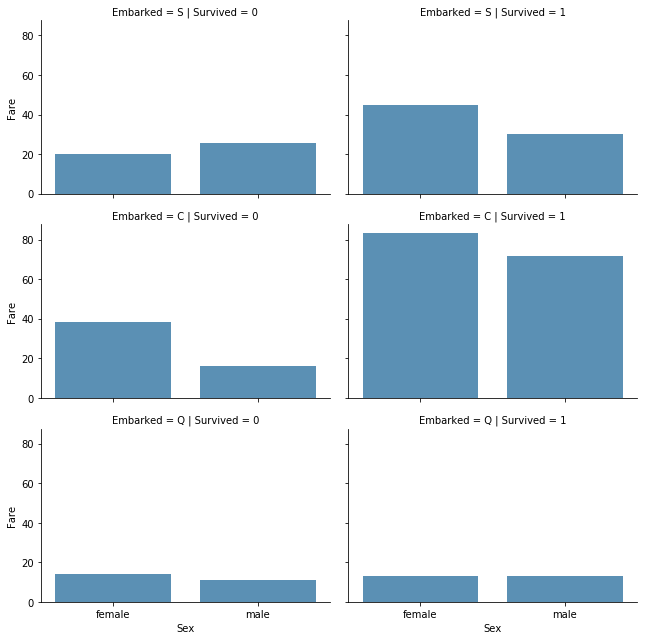

In [0]:
# Plotting a bar plot on station which people came from based on fare and their survival
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=1.5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()
plt.show()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


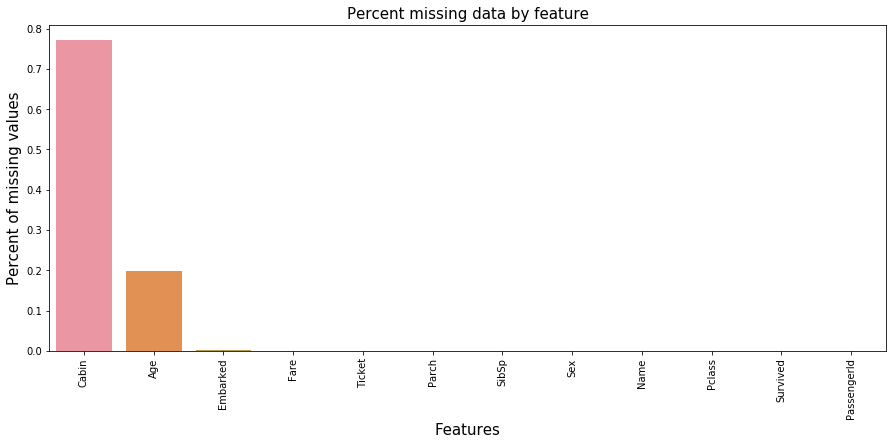

In [0]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()


#CLEANING.

In [0]:
y = train_df['Survived']
train =train_df.drop('Survived',axis=1)
test = test_df

In [0]:
#Separating datasets
train['separator'] = 0
test['separator'] = 1

In [193]:
# Concatting the train and the test set
train_test = pd.concat([train, test])
train_test.separator.unique()

array([0, 1])

In [194]:
# checking for null values
train_test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
separator         0
dtype: int64

Cabin had the most null values.

In [195]:
train_test.Cabin.fillna("U",inplace =True)
train_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
separator        0
dtype: int64

In [196]:
# Grouping Pclass with the mean of their ages
train_test.groupby('Pclass')['Age'].mean().sort_values(ascending=False)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [197]:
#We have two missing values on embarked hence we fill it with the mode
print("The most common embarked is :",train_test.Embarked.mode())
train_test['Embarked'].fillna('S',inplace=True)
train_test.isnull().sum()

The most common embarked is : 0    S
dtype: object


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
separator        0
dtype: int64

In [0]:
#Creating a function to fill missing value of age according to the mean of the respective pclass 
def age_approx(cols):
   Age = cols[0]
   Pclass = cols[1]
   if pd.isnull(Age):
       if Pclass == 1:
           return 39
       elif Pclass == 2:
           return 29
       else:
           return 24
   else:
       return Age

In [201]:
#Applying the function on out tt dataset
train_test['Age'] = train_test[['Age', 'Pclass']].apply(age_approx, axis=1)
train_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
separator      0
dtype: int64

In [202]:
# For the fare only one value is missing hence has no any significant weight
train_test.dropna(axis=0,inplace=True)
train_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
separator      0
dtype: int64

All missing values have been dealt with.

In [0]:
# Checking for duplicates
train_df.duplicated().any()

False

No duplicates found.

In [0]:
# Grouping Pclass with the mean of their ages
train_test.groupby('Pclass')['Age'].mean().sort_values(ascending=False)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

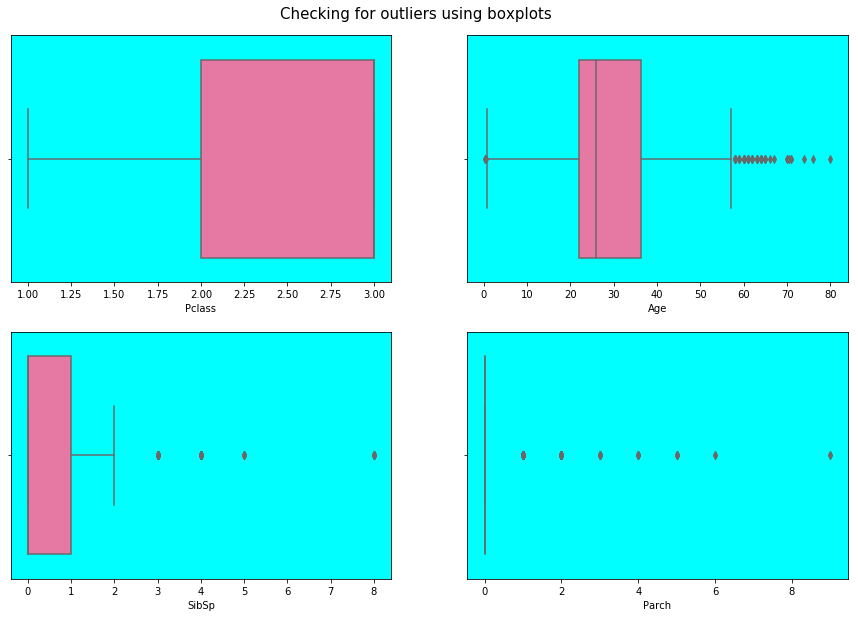

In [0]:
# Checking for outliers
numerical = ['Pclass','Age','SibSp','Parch','Fare']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), train_test, numerical):
  sns.boxplot(train_test[column], ax = ax,palette = 'RdPu')
  ax.set_facecolor('cyan')

Age Parch and sibsp has outliers but we will not remove them inorder to identify the reasons ato why they exists

In [0]:
# Checking multicollinerity
correlation = train_test.corr()
pd.DataFrame(np.linalg.inv(correlation),index =correlation.index,columns=correlation.columns)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,separator
PassengerId,2.890274,0.055110,0.002912,0.095887,-0.050120,0.006783,-2.330233
Pclass,0.055110,1.786523,0.584745,-0.090643,-0.127779,0.921391,-0.032803
Age,0.002912,0.584745,1.308979,0.190706,0.083264,0.013540,0.009307
SibSp,0.095887,-0.090643,0.190706,1.224287,-0.386684,-0.202170,-0.031090
Parch,-0.050120,-0.127779,0.083264,-0.386684,1.223591,-0.296986,0.025696
Fare,0.006783,0.921391,0.013540,-0.202170,-0.296986,1.610841,-0.037395
separator,-2.330233,-0.032803,0.009307,-0.031090,0.025696,-0.037395,2.881603


When we look across the diagonal there is no VIF that is nearing 5 or 5 hence there no multicolinearity ,thereis no need to drop any column



#FEATURE TUNING

In [203]:
# Replacing the other cabin names with the first letter 
train_test['Cabin'] = train_test['Cabin'].map(lambda x :x[0])
train_test['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [204]:
#Creating dummies for cabin
Cabin_dummies = pd.get_dummies(train_test['Cabin'],prefix = 'Cabin')
train_test_c = pd.concat([train_test,Cabin_dummies],axis=1)
train_test_c.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0,1,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,0,1,0,0,0,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,0,0,0,0,0,0,0,0,0,1


In [0]:
# Splitting the name where there is a comma and also stripping when there exist a dot because mostly its the title
titles = set()
for name in train_test_c['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [208]:
#This a distionary of all the titles and their meaning
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
# Creating the new columns with the key of the dictionary according to their respective names

train_test_c['Title'] = train_test_c['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_test_c['Title'] = train_test_c.Title.map(Title_Dictionary)

train_test_c.head(3)    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,0,0,0,0,0,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0,1,0,0,0,0,0,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,0,0,0,0,0,0,0,1,Miss


In [0]:
#creating the new columns with the key of the dictionary according to their respective names

train_test_c['Title'] = train_test_c['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train_test_c['Title'] = train_test_c.Title.map(Title_Dictionary)

train_test_c.head(5)    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Title
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0,1,0,0,0,0,0,Mrs
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0,0,0,1,0,0,0,0,0,Mrs
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,0,0,0,0,0,1,0,0,0,Mr
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G,S,0,0,0,0,0,0,0,1,0,Miss
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S,0,0,0,1,0,0,0,0,0,Miss


In [0]:
#Dropping columns that will not be needed in modelling.
train_test_c.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)

In [210]:
#This code converts categorical columns into dummies.
train_test_c = pd.get_dummies(train_test_c)
train_test_c.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0
3,4,1,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,5,3,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0


#MACHINE LEARNING 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#1. Splitting data.

#KNN Classification.

In [0]:
# Splitting the dataset into train and test set using separator and later dropping the separator column
train = train_test_c[train_test_c.separator == 0]
test = train_test_c[train_test_c.separator == 1]

train.drop('separator', axis  = 1, inplace = True)
test.drop('separator', axis  = 1, inplace = True)


#Partition into 80-20

In [216]:
# Partitioning each dataset into two parts i.e 80 - 20  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6480446927374302


array([[89, 21],
       [42, 27]])

For this particular partition I found the accuracy of 64%

# Partition of 70-30 

In [217]:
# Randomly partition each dataset into two parts i.e 70 - 30  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6119402985074627


array([[129,  39],
       [ 65,  35]])

This particular partition i found an accuracy of 61% which is slightly lower than the 80-20 one.

Partition of 60-40

In [218]:
# Randomly partition each dataset into two parts i.e 60 - 40  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6246498599439776


array([[176,  45],
       [ 89,  47]])

The 60-40 partition gives a 62% accuracy which is lower than the 80-20 one and more than the 70-30 one

#OPTIMIZATION process.

In [223]:
# Using randomsearch to get the most optimal parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf = KNeighborsClassifier()

params = {'n_neighbors': list(range(1,15)), 
         'weights': ['uniform', 'distance'],
         'p' :[1,2],
         'metric':['minkowski','euclidean','manhattan']}
kfold = KFold(n_splits=5,random_state=0)
rsc = RandomizedSearchCV(clf,params,cv=kfold,random_state=0,verbose=0)
rsc.fit(X_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 6, 'metric': 'manhattan'}
0.6530898876404494


I have been able to optimize my model and the accuracy increased by about 1% to 65% from 64%

In [220]:
# Now using we want to check how the accuracy will change with standard scaler and feature reduction using LDA
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = KNeighborsClassifier(weights = 'distance', p = 2, n_neighbors = 6, metric = 'manhattan')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.7932960893854749


array([[89, 21],
       [16, 53]])

I employed sclaling of my dataset in an effort to improve my accuracy and applying LDA and optimal parameters.My accuracy improved to 79.3% this is a great improvement from 64%

#Challenge and Conclusion

In [221]:
# We challenge the solution using xgboost classifier
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8100558659217877


array([[94, 16],
       [18, 51]])

In [222]:
# Now we want to challenge solution using an ensemble method with adabost classifier
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=5))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.7541899441340782


array([[81, 29],
       [15, 54]])

2. **ANALYSIS OF THE SPAM DATA.**

#Loading and Checking for Information.

In [225]:
#Loading the spambase dataset(dataset3) and viewing the first 5 rows.
spambase_df=pd.read_csv('spambase.data')
spambase_df.head(6)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
5,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,0.96,1.28,0.00,0.00,0.00,0.96,0.00,0.32,3.85,0.00,0.64,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1


In [226]:
#Displaying summary of statistics of the spambase dataset
spambase_df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [227]:
#Showing the information of the dataset.
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1       4600 non-null float64
0.32      4600 non-null float64
0.2       4600 non-null float64
0.3       4600 non-null float64
0.4       4600 non-null float64
0.5       4600 non-null float64
0.6       4600 non-null float64
0.7       4600 non-null float64
0.64.2    4600 non-null float64
0.8       4600 non-null float64
0.9       4600 non-null float64
0.10      4600 non-null float64
0.32.1    4600 non-null float64
0.11      4600 non-null float64
1.29      4600 non-null float64
1.93      4600 non-null float64
0.12      4600 non-null float64
0.96      4600 non-null float64
0.13      4600 non-null float64
0.14      4600 non-null float64
0.15      4600 non-null float64
0.16      4600 non-null float64
0.17      4600 non-null float64
0.18      4600 non-null float64
0.19      4600 non-null float

In [228]:
#Showing the rows and columns.
spambase_df.shape

(4600, 58)

#Exploratory Data Analysis.

In [0]:
spambase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
0         4600 non-null float64
0.64      4600 non-null float64
0.64.1    4600 non-null float64
0.1       4600 non-null float64
0.32      4600 non-null float64
0.2       4600 non-null float64
0.3       4600 non-null float64
0.4       4600 non-null float64
0.5       4600 non-null float64
0.6       4600 non-null float64
0.7       4600 non-null float64
0.64.2    4600 non-null float64
0.8       4600 non-null float64
0.9       4600 non-null float64
0.10      4600 non-null float64
0.32.1    4600 non-null float64
0.11      4600 non-null float64
1.29      4600 non-null float64
1.93      4600 non-null float64
0.12      4600 non-null float64
0.96      4600 non-null float64
0.13      4600 non-null float64
0.14      4600 non-null float64
0.15      4600 non-null float64
0.16      4600 non-null float64
0.17      4600 non-null float64
0.18      4600 non-null float64
0.19      4600 non-null float

There are no null values and the data types are all floats and integers



In [229]:
#Getting unique values for the dataset
columns = spambase_df.columns
for i in columns:
  print(i)
  print(spambase_df[i].unique())
  print("******************")
  print("\n")

0
[0.21 0.06 0.   0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
******************


0.64
[2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01 7.000e-02
 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01 1.920e+00
 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01 4.400e-01
 9.400e-01 1.800e-01 7.200e-01 7.900e

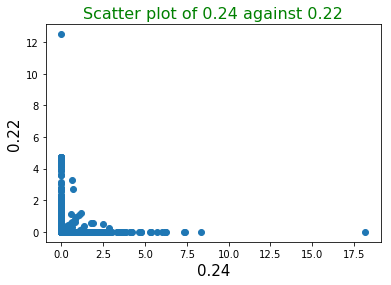

In [0]:
# Checking '0.24'  and '0.22' on a scatter plot
plt.scatter(spambase_df['0.24'],spambase_df['0.22'])
plt.xlabel("0.24",fontsize=15)
plt.ylabel("0.22",fontsize=15)
plt.title("Scatter plot of 0.24 against 0.22",fontsize=16,color="green")
plt.show()

No linearity between 0.24 and 0.22

#Cleaning.

In [230]:
# Checking for duplicates
spambase_df.duplicated().any()

True

There are duplicates in the spambase dataset. 

In [0]:
#Dropping the duplicates
spambase_df.drop_duplicates(inplace=True)

In [232]:
#Are duplicates dropped?
spambase_df.duplicated().any()

False

Yes, the duplicates are successfully dropped.

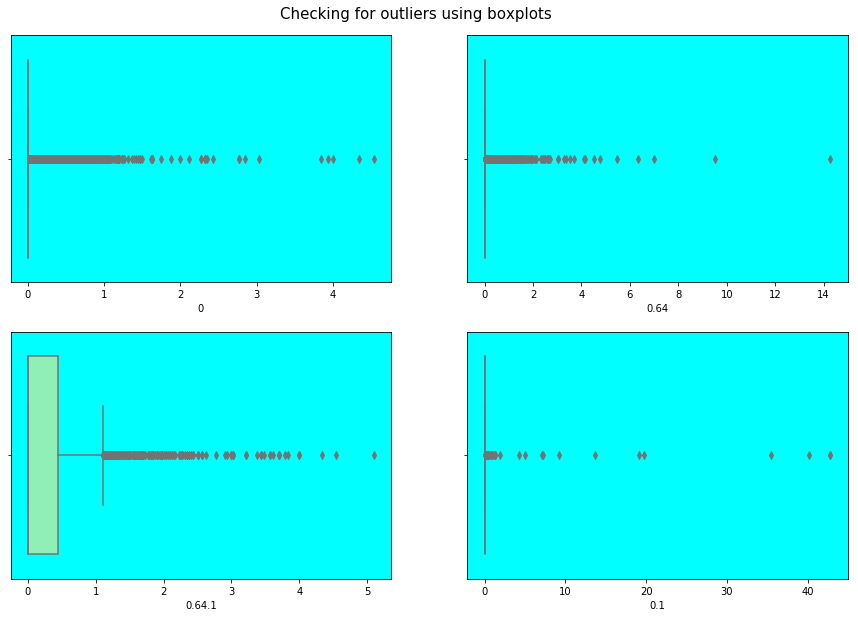

In [0]:
# Checking for outliers of the first four columns and there is evidence of outliers
numerical = spambase_df
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), spambase_df, numerical):
  sns.boxplot(spambase_df[column], ax = ax,palette = 'rainbow')
  ax.set_facecolor('cyan')

There are so many outliers

In [237]:
# checking for multicollinearity
correlation = spambase_df.corr()
spambase_data = pd.DataFrame(np.linalg.inv(correlation),index =correlation.index,columns=correlation.columns)
pd.Series(np.diag(spambase_data), index=[spambase_data.index, spambase_data.columns]).sort_values(ascending=False)

0.23    0.23      102.289490
0.25    0.25       99.425255
0.31    0.31        3.436986
0.27    0.27        2.312860
61      61          2.267062
1       1           2.259203
0.22    0.22        2.242449
0.21    0.21        2.097397
0.19    0.19        1.849491
0.20    0.20        1.815912
0.26    0.26        1.668396
0.16    0.16        1.573232
0.41    0.41        1.567727
0.17    0.17        1.500553
3.756   3.756       1.477924
0.33    0.33        1.477796
278     278         1.475464
0.14    0.14        1.363122
0.96    0.96        1.361977
0.10    0.10        1.345852
0.13    0.13        1.328090
1.93    1.93        1.292740
0.43    0.43        1.281612
0.28    0.28        1.260782
0.40    0.40        1.258426
0.34    0.34        1.219328
0.11    0.11        1.209508
0.5     0.5         1.197592
0.3     0.3         1.196452
1.29    1.29        1.193662
0.7     0.7         1.188796
0.37    0.37        1.160100
0.32    0.32        1.139513
0.32.1  0.32.1      1.127416
0.32.2  0.32.2

In [0]:
# Dropping 0.23 column
spambase_df.drop('0.23',inplace=True,axis=1)

#MACHINE LEARNING.

#Naive Bayes: Gaussian Classification.

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
# Creating feature set and target set from the spambase dataset
X = spambase_df.drop('1',axis=1)
y = spambase_df['1']

#First Partition: 80-20

In [245]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.831353919239905


array([[372, 126],
       [ 16, 328]])

This particular partition has an accuracy of 83.1% which is considerably high.

# Second Partition: 70-30

In [248]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8329374505146476


array([[573, 190],
       [ 21, 479]])

The 70-30 partition gives an accuracy of 83.2% which has slightly improved by about 0.1%

In [254]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8319477434679335


array([[739, 255],
       [ 28, 662]])

In [252]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8931116389548693


array([[470,  22],
       [ 68, 282]])

# Challenge and Conclusion

#Random Forest Method

In [255]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8859857482185273


array([[452,  46],
       [ 50, 294]])

#Gradient Boost Method

In [256]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8824228028503563


array([[450,  48],
       [ 51, 293]])

#XG Boost Method

In [257]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Applying standard scaler with mean True  and with standard deviation true to make normal
sc = StandardScaler(with_mean=True,with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Applying GausianNB for classification
clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.9263657957244655


array([[463,  35],
       [ 27, 317]])